<a href="https://colab.research.google.com/github/chadantomar/ML/blob/main/YOLO_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-02-12 12:34:51--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  13.9MB/s    in 23m 57s 

2024-02-12 12:58:48 (169 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
import cv2 as cv
import numpy as np
import time
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
import matplotlib.pyplot as plt
import cv2
def cv2_imshow1(a, **kwargs):
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

    return plt.imshow(a, **kwargs)

In [ ]:
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

-1

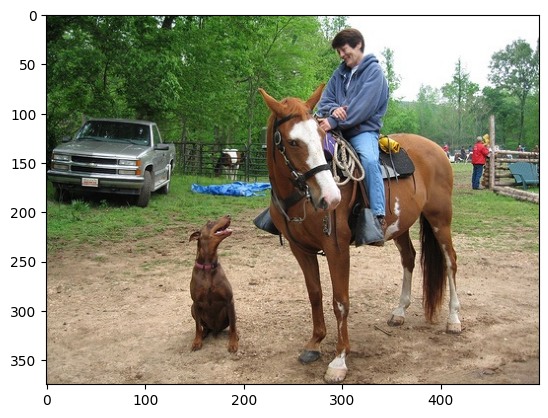

In [ ]:
img = cv.imread('horse.jpg')
cv2_imshow1(img)
cv.waitKey(1)

In [ ]:
ln = net.getLayerNames()

In [ ]:
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

We can see here its trained using 254 layers

In [ ]:
# construct a blob from the image
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

In [ ]:
blob.shape

(1, 3, 416, 416)

In [ ]:
r = blob[0, 0, :, :]

In [ ]:
r.shape

(416, 416)

In [ ]:
from PIL import Image
import io
import matplotlib.pyplot as plt

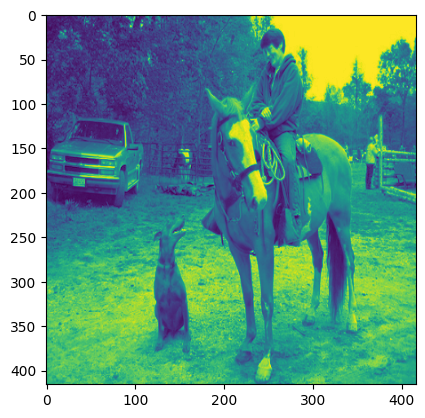

In [ ]:
plt.imshow(r)

In [ ]:
r0 = blob[0, 0, :, :]

In [ ]:
def trackbar2(x):
    confidence = x/100
    r = r0.copy()
    for output in np.vstack(outputs):
        if output[4] > confidence:
            x, y, w, h = output[:4]
            p0 = int((x-w/2)*416), int((y-h/2)*416)
            p1 = int((x+w/2)*416), int((y+h/2)*416)
            cv.rectangle(r, p0, p1, 1, 1)
    plt.imshow(r)
    text = f'Bbox confidence={confidence}'
    cv.displayOverlay('blob', text)

In [ ]:
classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')
WHITE = (255, 255, 255)
img = None
img0 = None
outputs = None
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

###Check in Steps

In [ ]:
import numpy as np
import os

In [ ]:
classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

In [ ]:
colors.shape

(80, 3)

In [ ]:
import cv2 as cv

In [ ]:
net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

In [ ]:
ln = net.getLayerNames()

In [ ]:
len(ln)

254

In [ ]:
unconnected= net.getUnconnectedOutLayersNames()

In [ ]:
import matplotlib.pyplot as plt


In [43]:
len(ln)

254

In [39]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [44]:
ln = net.getLayerNames()
for i in net.getUnconnectedOutLayers():
  print(ln[i-1])


yolo_82
yolo_94
yolo_106


In [45]:
net.getUnconnectedOutLayersNames()

('yolo_82', 'yolo_94', 'yolo_106')

In [46]:
ln = [ln[i-1] for i in net.getUnconnectedOutLayers()]

In [47]:
ln

['yolo_82', 'yolo_94', 'yolo_106']

In [52]:
outputs = net.forward(ln)

In [57]:
outputs[0].shape ,outputs[1].shape , outputs[2].shape

((507, 85), (2028, 85), (8112, 85))

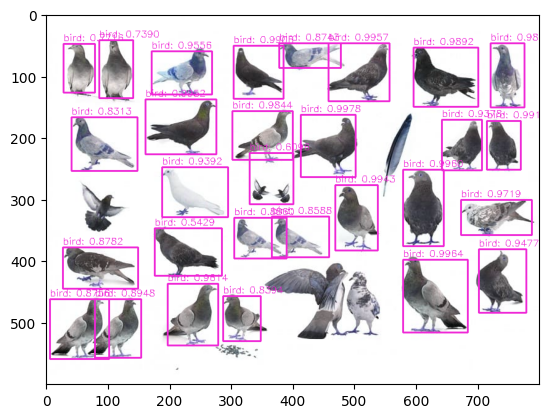

In [59]:
# YOLO object detection
import cv2 as cv
import numpy as np
import time

WHITE = (255, 255, 255)
img = None
img0 = None
outputs = None

# Load names of classes and get random colors
classes = open('coco.names').read().strip().split('\n')
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')


net = cv.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)


# determine the output layer
ln = net.getLayerNames()
ln = net.getUnconnectedOutLayersNames() #[ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

def load_image(path):
    global img, img0, outputs, ln

    img0 = cv.imread(path)
    img = img0.copy()

    blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

    net.setInput(blob)
    outputs = net.forward(ln)
    outputs = np.vstack(outputs)

    post_process(img, outputs, 0.5)
    plt.imshow(img)


def post_process(img, outputs, conf):
    H, W = img.shape[:2]

    boxes = []
    confidences = []
    classIDs = []

    for output in outputs:
        scores = output[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > conf:
            x, y, w, h = output[:4] * np.array([W, H, W, H])
            p0 = int(x - w//2), int(y - h//2)
            p1 = int(x + w//2), int(y + h//2)
            boxes.append([*p0, int(w), int(h)])
            confidences.append(float(confidence))
            classIDs.append(classID)


    indices = cv.dnn.NMSBoxes(boxes, confidences, conf, conf-0.1)
    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in colors[classIDs[i]]]
            cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
            cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)


load_image('bird.jpeg')

In [60]:
!git clone https://github.com/puzzledqs/BBox-Label-Tool.git

Cloning into 'BBox-Label-Tool'...
remote: Enumerating objects: 1161, done.
remote: Total 1161 (delta 0), reused 0 (delta 0), pack-reused 1161
Receiving objects: 100% (1161/1161), 32.16 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [61]:
%cd BBox-Label-Tool/

/content/BBox-Label-Tool


In [62]:
!python main.py

  File "/content/BBox-Label-Tool/main.py", line 136
    print 'No .JPEG images found in the specified dir!'
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)?
